# Library Connections and File Names

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier
from itertools import product
from xgboost import XGBClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


# Data Export

In [2]:
X_train = pd.read_csv("/kaggle/input/advanced-dls-spring-2021/train.csv")
X_test = pd.read_csv("/kaggle/input/advanced-dls-spring-2021/test.csv")
submission_example = pd.read_csv("/kaggle/input/advanced-dls-spring-2021/submission.csv")

In [3]:
X_train.shape

(5282, 20)

In [4]:
X_test.shape

(1761, 19)

In [5]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
X_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [7]:
submission_example.head()

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
y_train, X_train = X_train['Churn'], X_train.drop('Churn', axis=1)

In [9]:
y_train.shape

(5282,)

In [10]:
X_train.shape

(5282, 19)

# Processing data

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [12]:
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [13]:
unique_values = {col: [X_train[col].unique(), len(X_train[col].unique())] for col in X_train.columns}
unique_values

{'ClientPeriod': [array([55, 72,  1, 32, 60, 25, 27, 50, 16, 70, 69, 26, 38, 30, 52, 71, 59,
         61,  7, 20, 48, 22,  2, 21, 44, 66, 58, 46, 45,  5,  4,  3, 62,  6,
         39, 68, 51, 40, 10, 43, 12, 35, 31, 67,  8, 11, 29, 37, 33, 14, 15,
         47, 23, 65, 13, 41, 53,  9, 64, 42, 34, 17, 18, 63, 56, 54, 24, 28,
         49, 19, 57, 36,  0]),
  73],
 'MonthlySpending': [array([ 19.5 ,  25.85,  75.9 , ..., 112.25, 117.5 ,  98.2 ]),
  1468],
 'TotalSpent': [array(['1026.35', '1872.2', '75.9', ..., '55.05', '2215.25', '1375.6'],
        dtype=object),
  4978],
 'Sex': [array(['Male', 'Female'], dtype=object), 2],
 'IsSeniorCitizen': [array([0, 1]), 2],
 'HasPartner': [array(['Yes', 'No'], dtype=object), 2],
 'HasChild': [array(['Yes', 'No'], dtype=object), 2],
 'HasPhoneService': [array(['Yes', 'No'], dtype=object), 2],
 'HasMultiplePhoneNumbers': [array(['No', 'Yes', 'No phone service'], dtype=object),
  3],
 'HasInternetService': [array(['No', 'Fiber optic', 'DSL'], dtype=obje

Most probably that all columns in train dataset (except Total spent and Monthly spending maybe) are categorical.

Columns meanings:
- ClientPeriod: this feature can mean duration of service in days/weeks etc.
- MontlySpending: volume on payments per month
- TotalSpent: volume of payments over all duration
- Sex, IsSeniorCitizen, HasPartner, HasChild, HasPhoneService, HasMultiplePhoneNumbers, HasInternetService, HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess, HasOnlineTV, HasMovieSubscription, HasContractPhone, IsBillingPaperless: means that written in name

In [14]:
num_cols = ['MonthlySpending', 'TotalSpent']
cat_cols = [col for col in X_train.columns if col not in num_cols]

There are string values (' ') in column TotalSpent for X_train and X_test
For LogisticRegression model: ...
For GradientBoosting model(s) replace this values on np.nan
These actions will be shown in next parts

# EDA + Preprocessing data

<Axes: xlabel='Churn', ylabel='Count'>

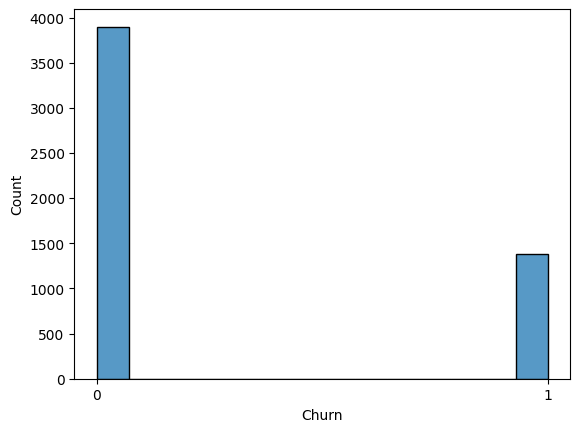

In [15]:
plt.xticks(ticks=[0, 1])
sns.histplot(y_train)

In [22]:
def plot_cat_features(train_data, test_data, col):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

    ax_train, ax_test = axs.flat[0], axs.flat[1]

    ax_train.set_xlabel(col)
    ax_train.set_title('For train column')
    values = train_data[col].value_counts()
    ax_train.set_xticklabels(labels=values.index, rotation=20)
    sns.barplot(x=values.index, y=values, ax=ax_train)

    ax_test.set_xlabel(col)
    ax_test.set_title('For test column')
    values = test_data[col].value_counts()
    ax_test.set_xticklabels(labels=values.index, rotation=20)
    sns.barplot(x=values.index, y=values, ax=ax_test)

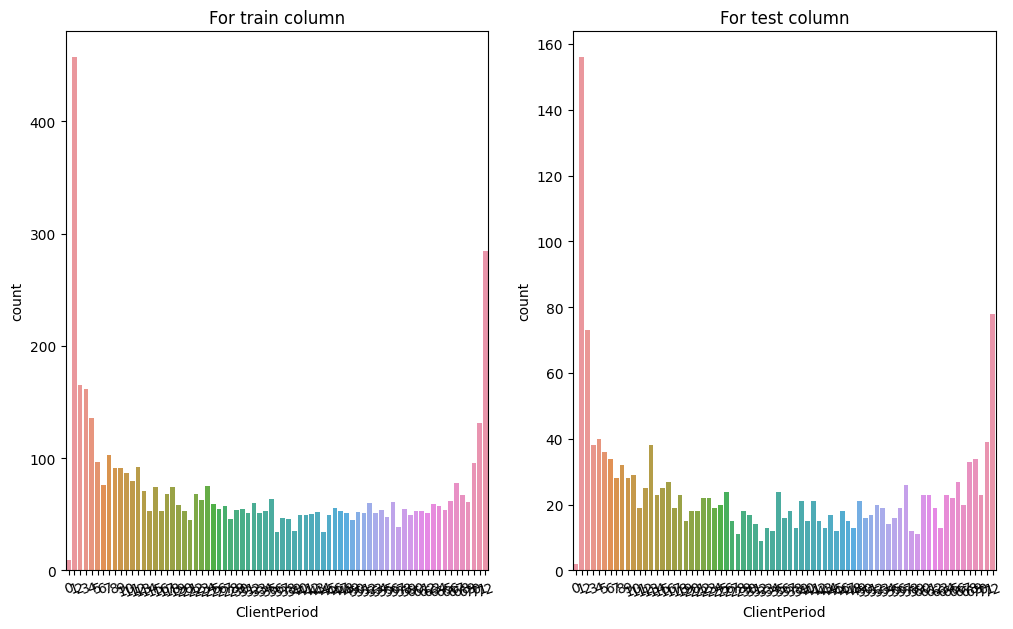

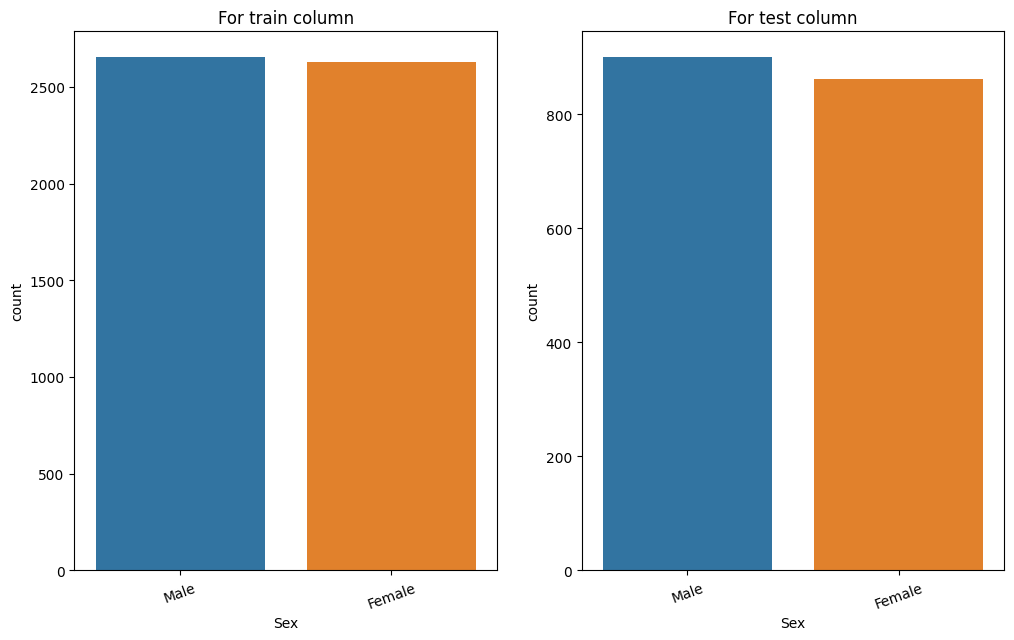

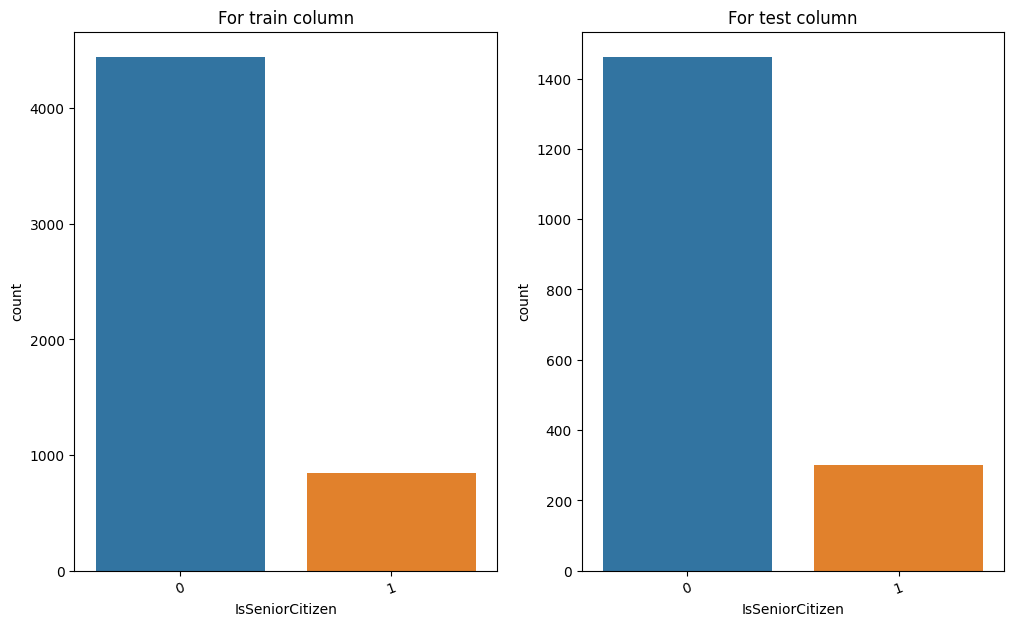

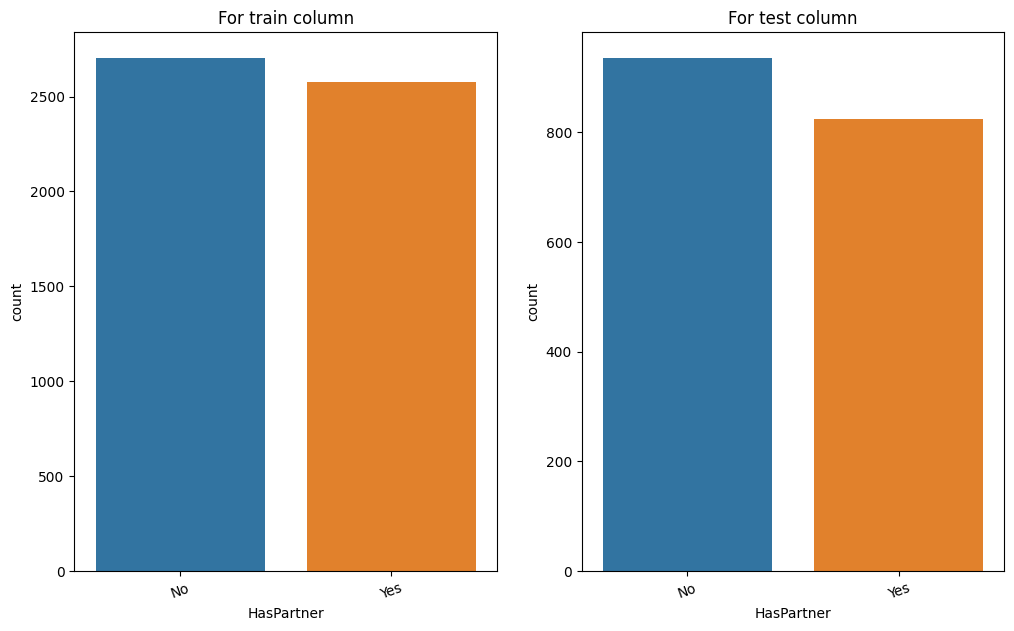

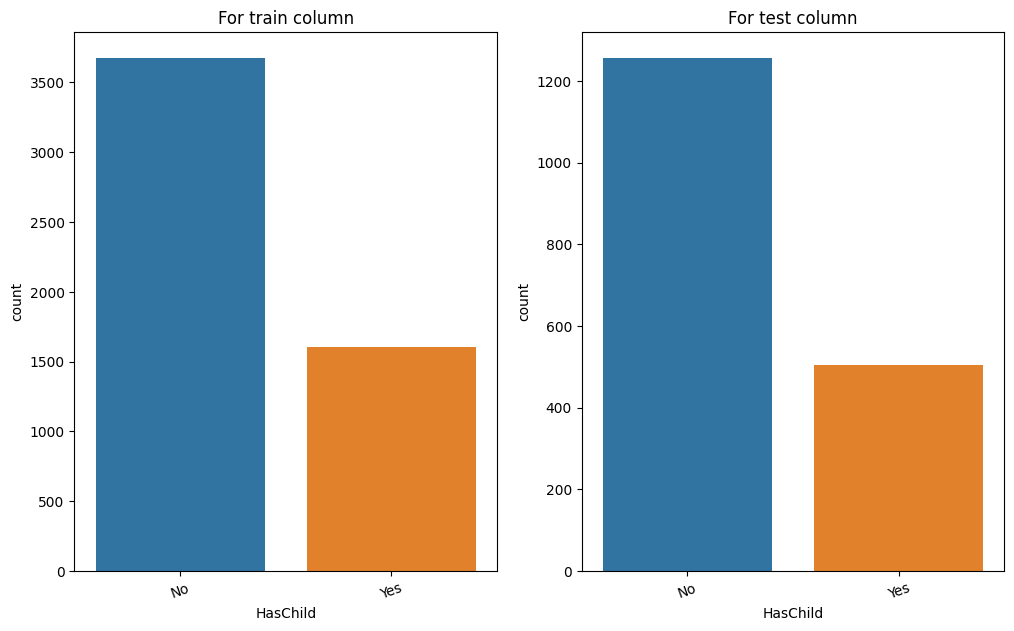

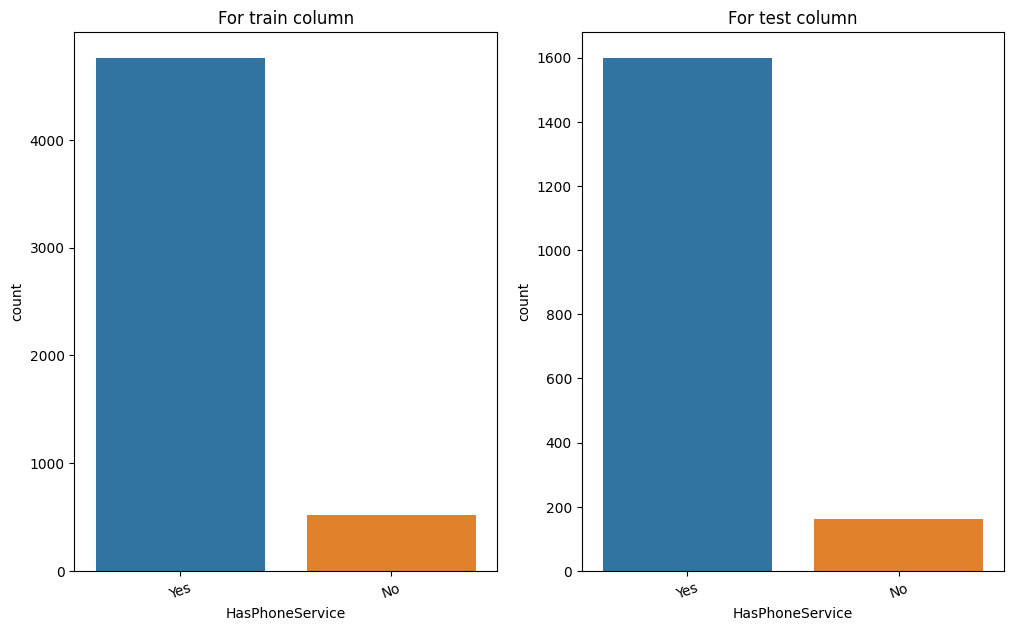

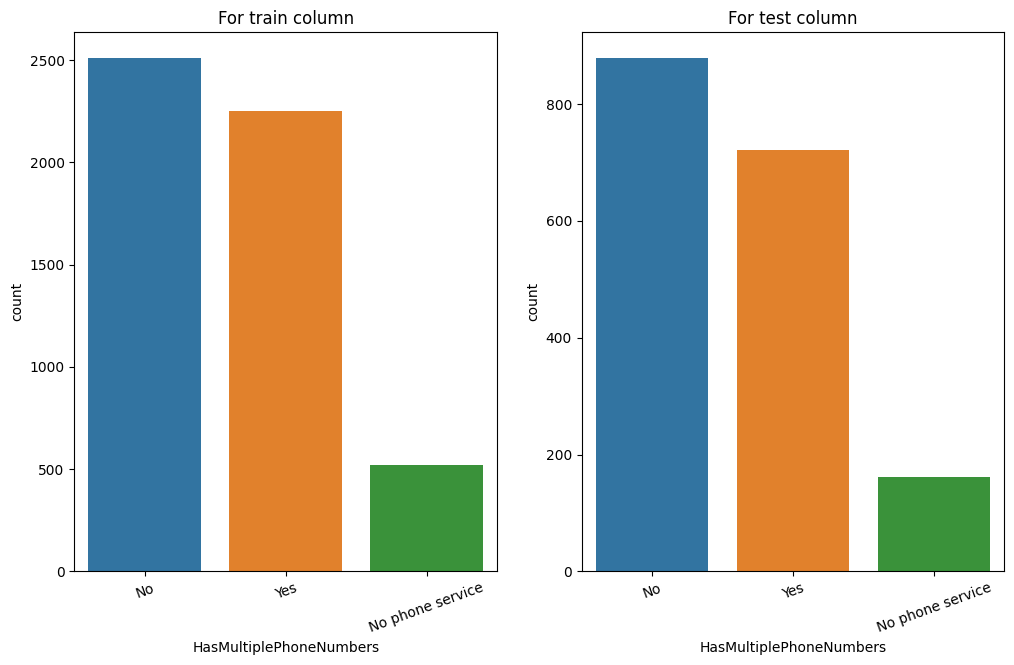

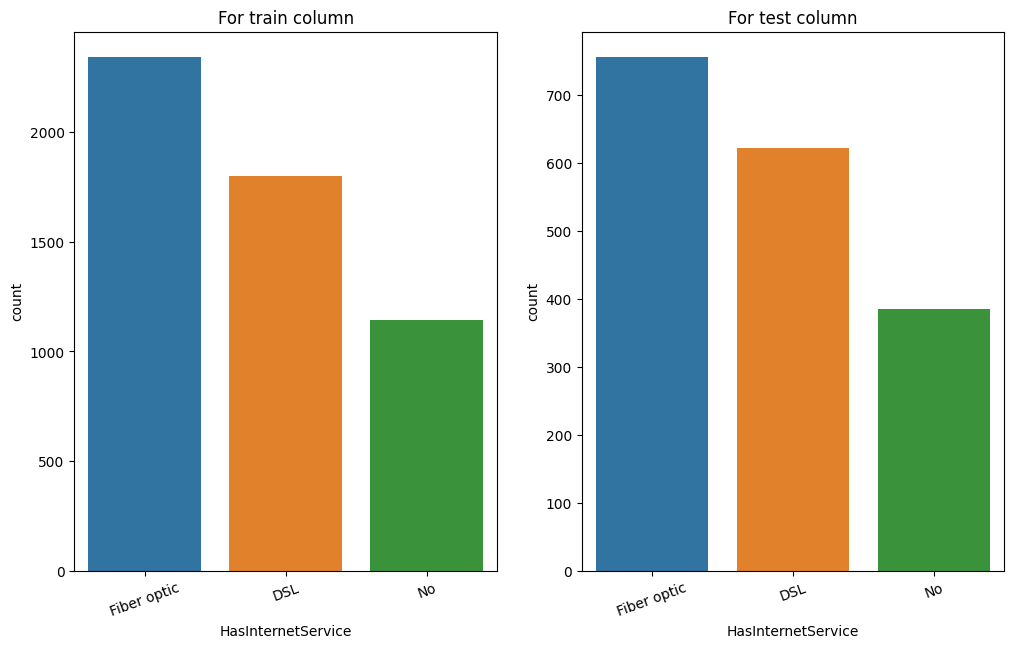

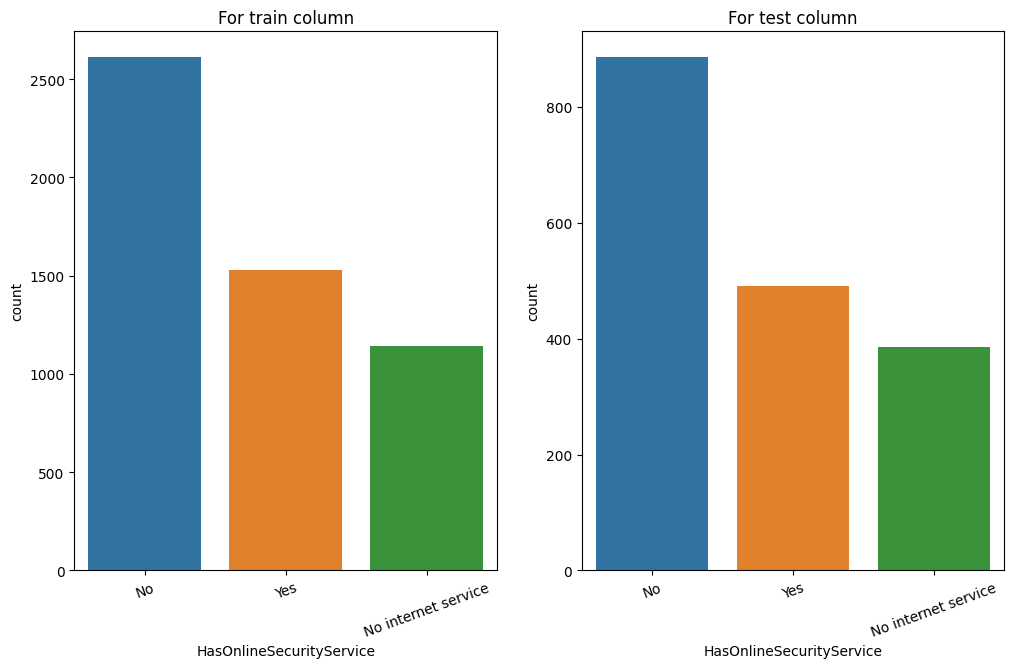

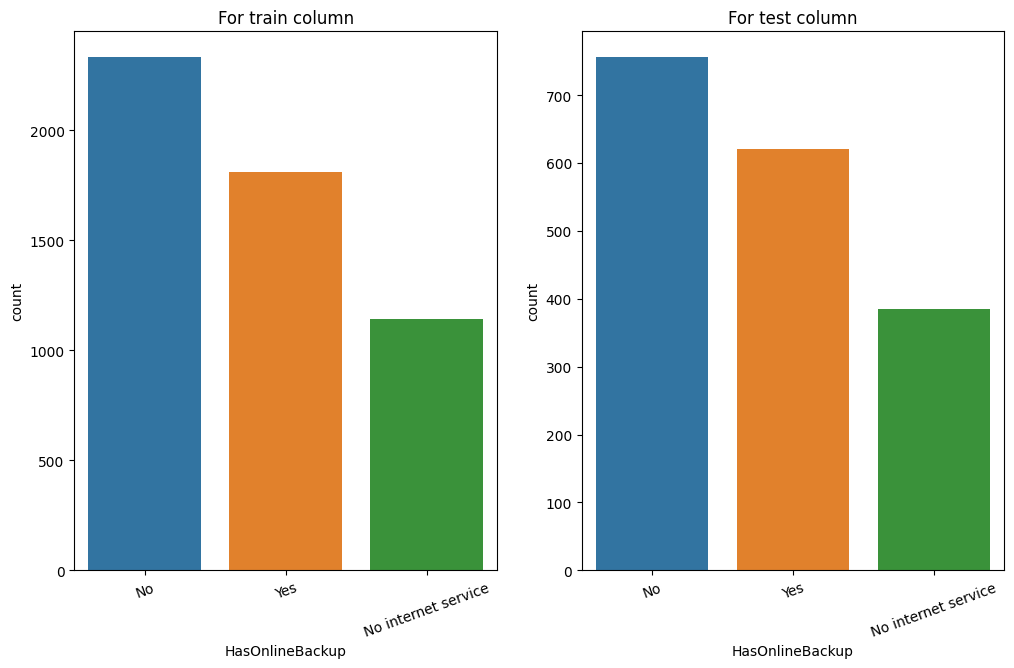

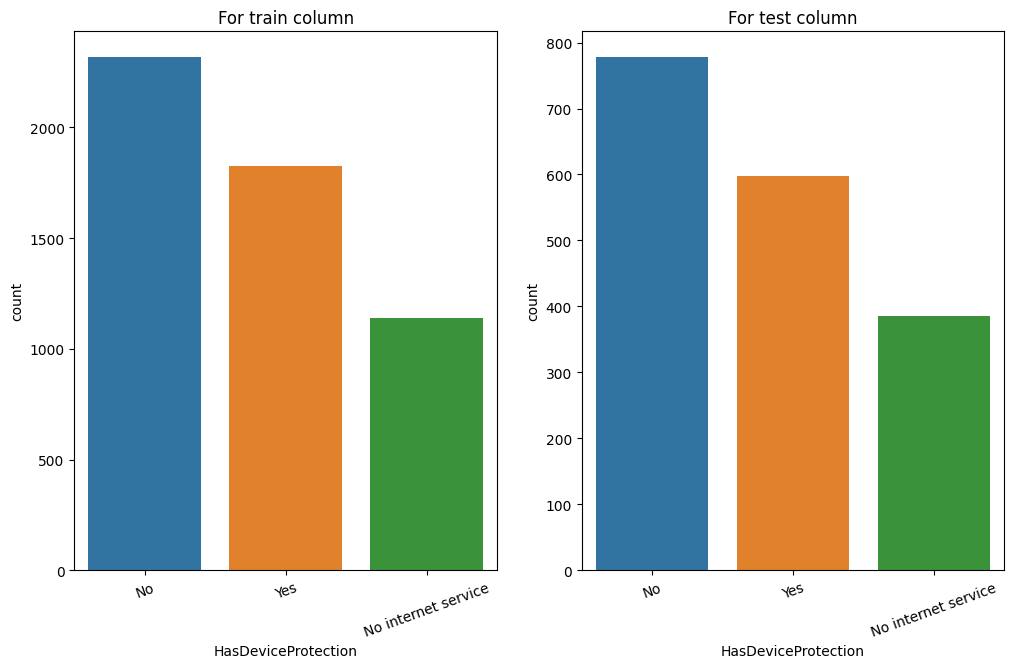

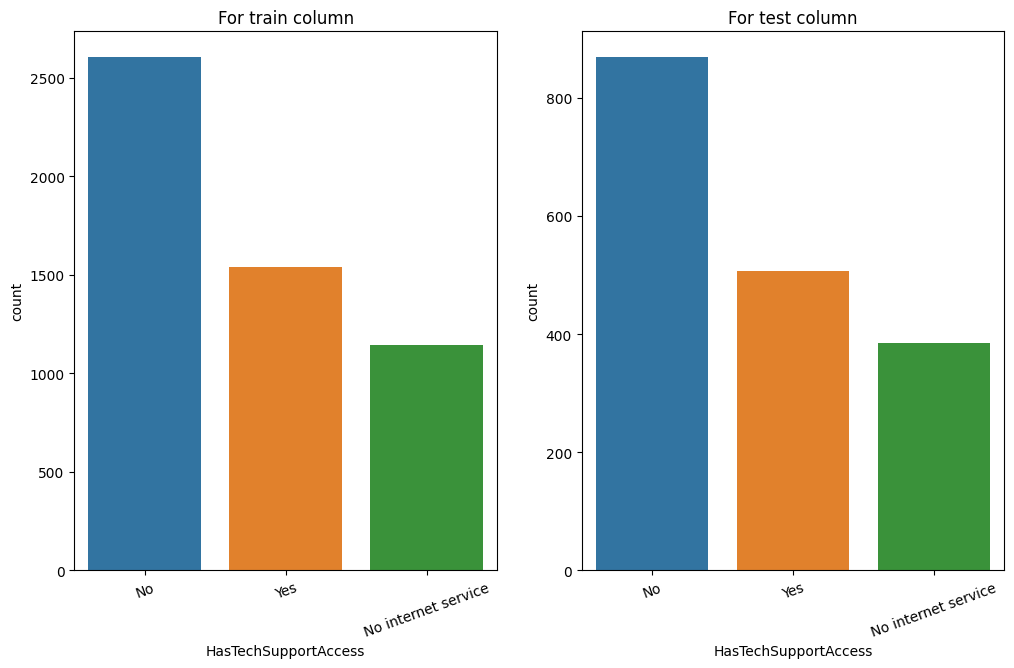

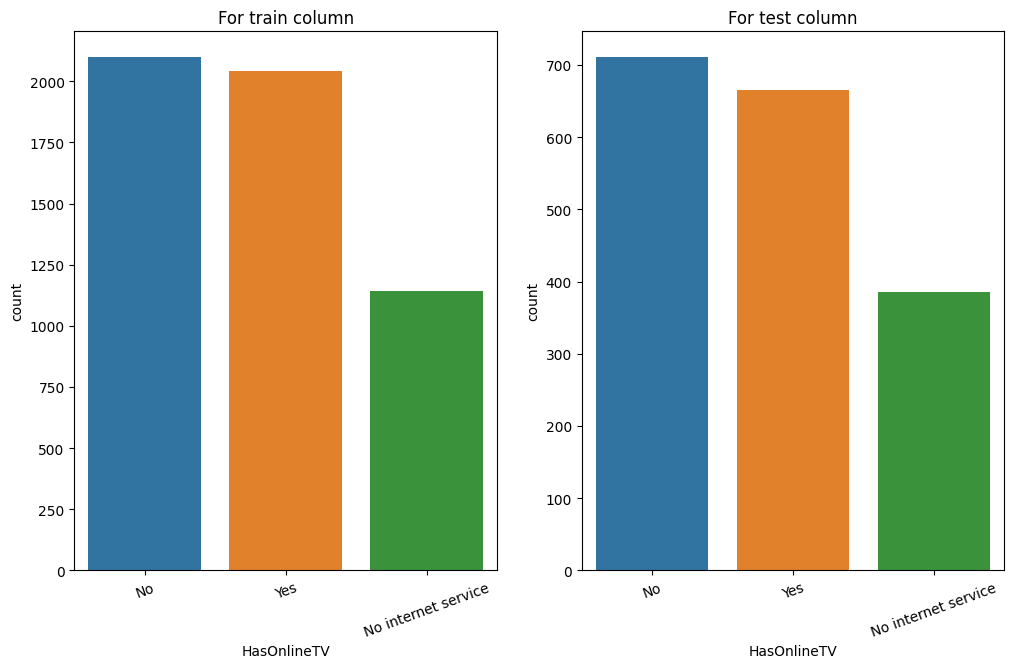

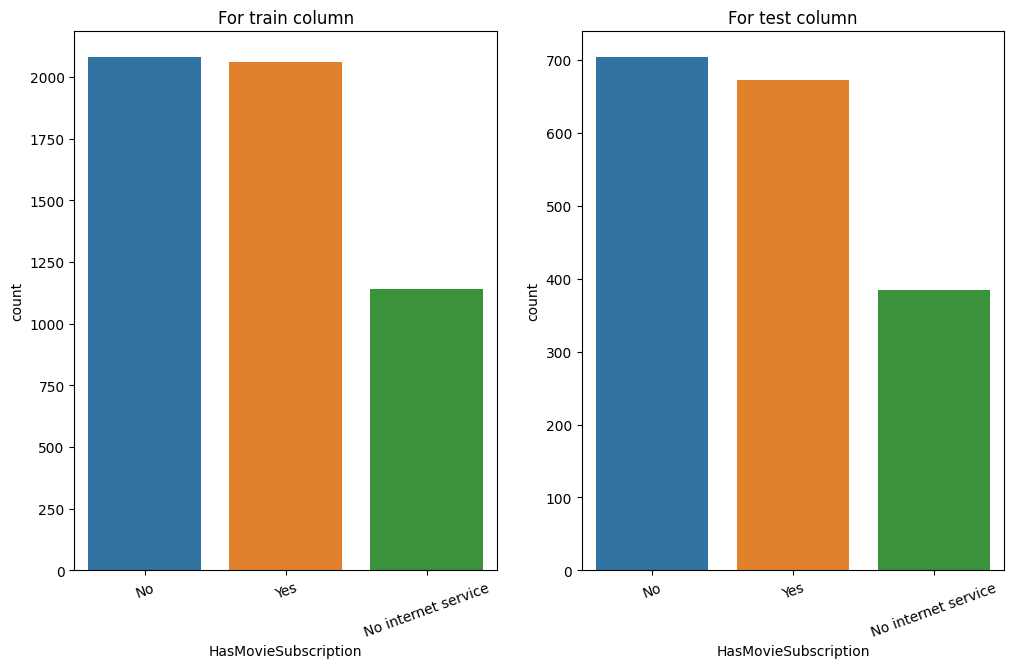

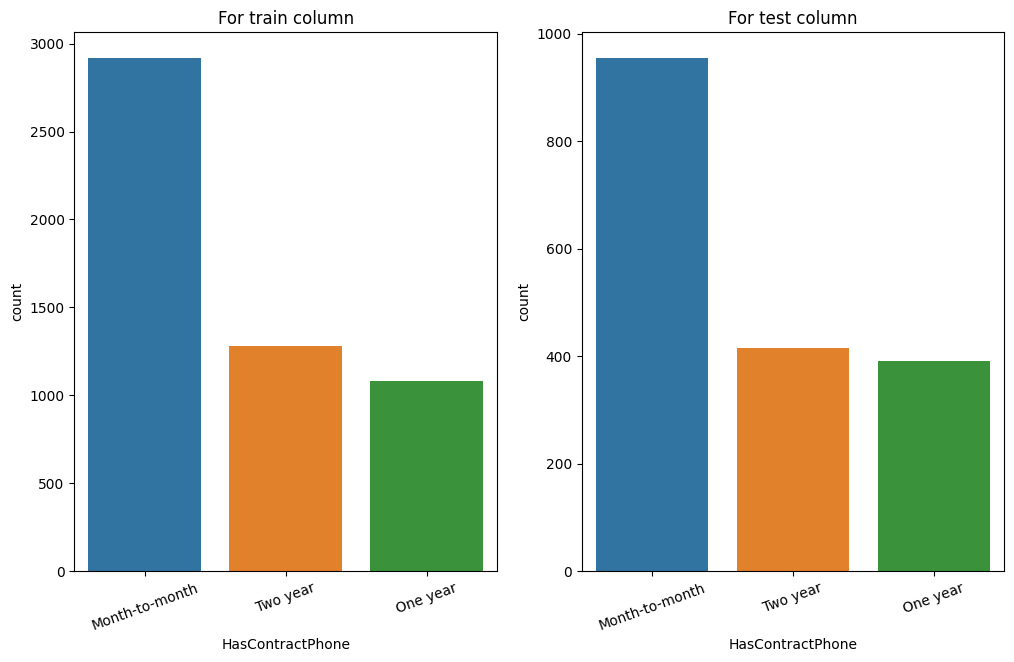

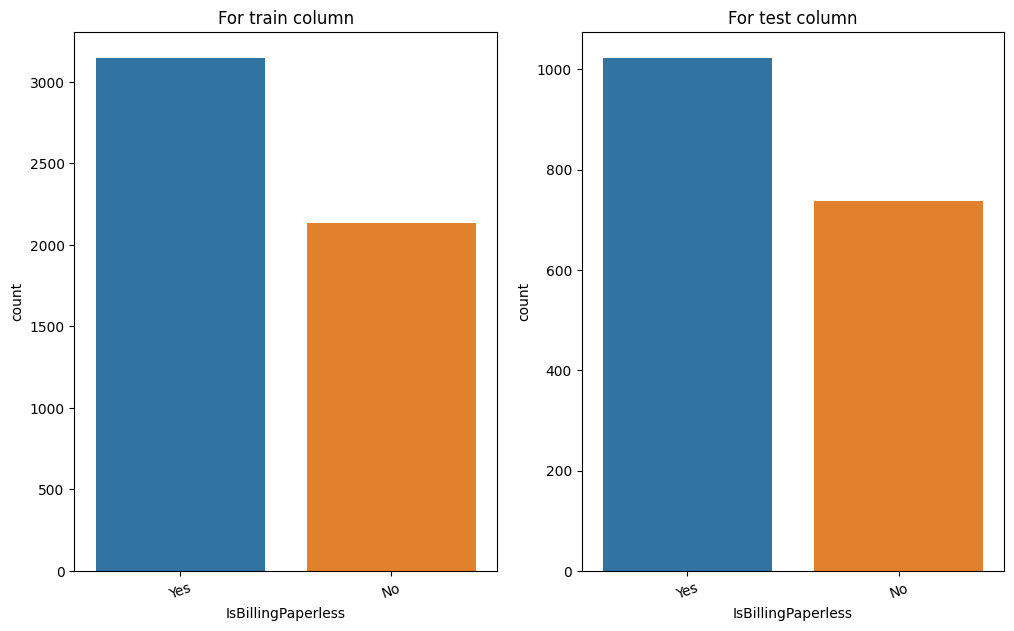

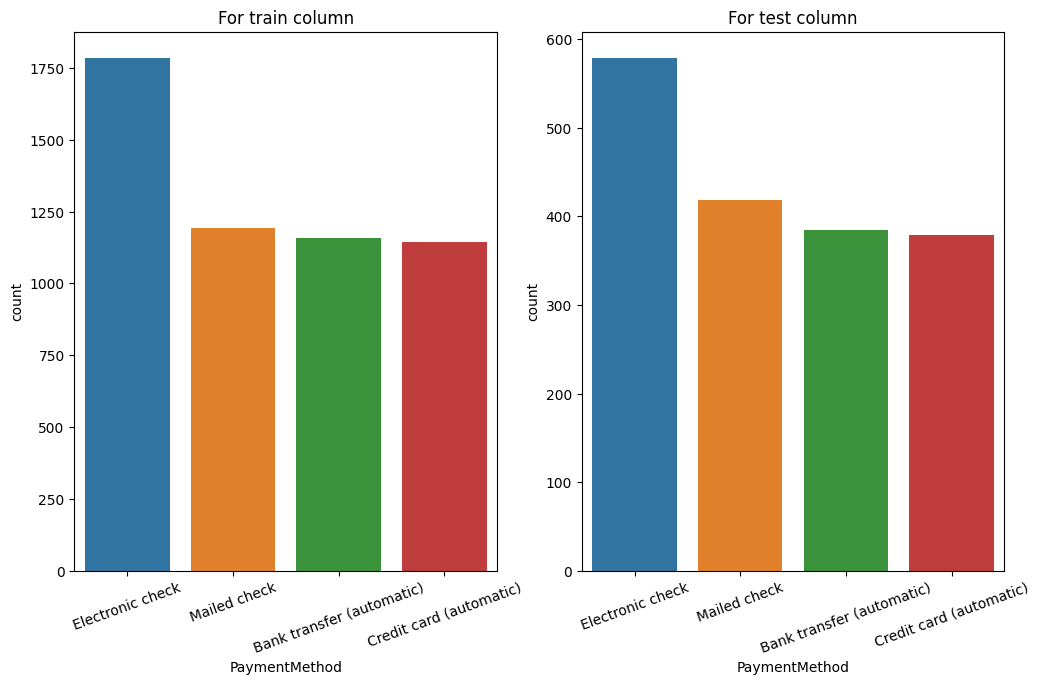

In [17]:
for col in cat_cols:
    plot_cat_features(X_train, X_test, col)

Distributions of categorical features are very same, so in this task we can use linear models (Logistic Regression) and Target-Encoding for this model

In [21]:
def plot_numeric_features(train_data, test_data, col):
    train, test = train_data[col].copy(), test_data[col].copy()
    if train.dtype != float:
        train, test = pd.Series(filter(lambda x: x != ' ', train)).astype(float), pd.Series(filter(lambda x: x != ' ', test)).astype(float)
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

    ax_train, ax_test = axs.flat[0], axs.flat[1]

    ax_train.set_xlabel(col)
    ax_train.set_title('For train column')
    sns.kdeplot(train.dropna().astype(float), ax=ax_train)

    ax_test.set_xlabel(col)
    ax_test.set_title('For test column')
    sns.kdeplot(test.dropna().astype(float), ax=ax_test)

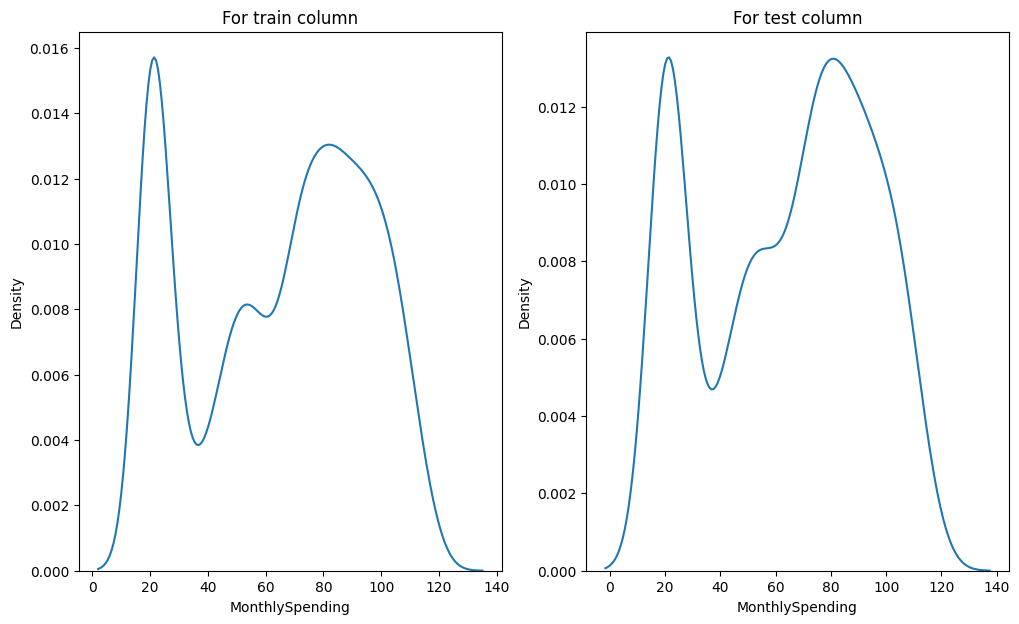

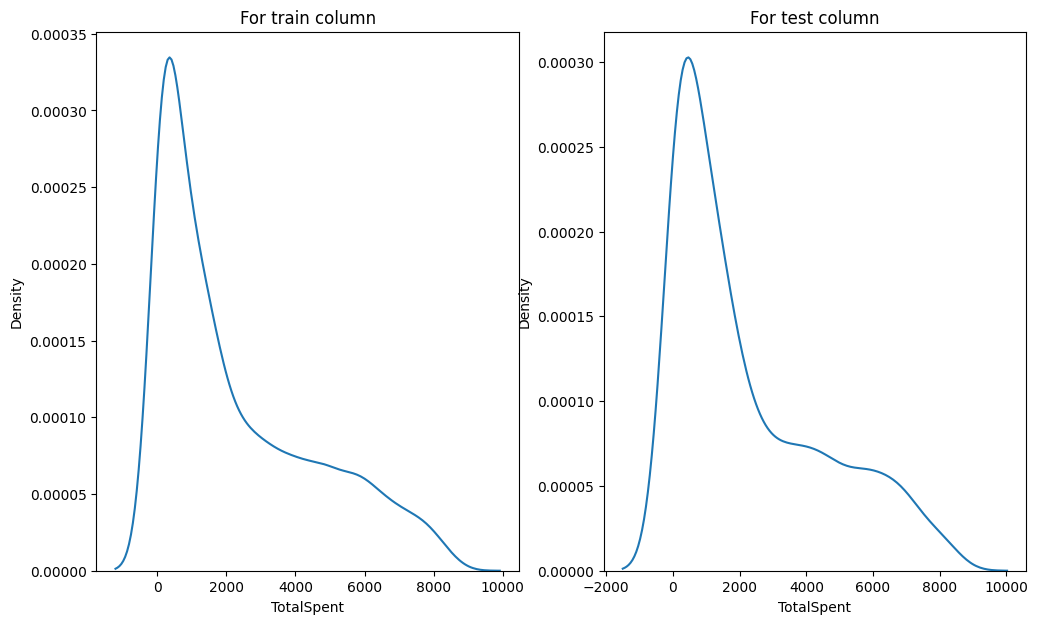

In [19]:
for col in num_cols:
    plot_numeric_features(X_train, X_test, col)

Distributions of numeric features are similar in the most but far away from normal distribution.

Firstly, we're try to preprocess our data for more comfortable analysis by means of Target-Encoding for categorical features and StandardScaler normalization for numeric features; numeric features converting is necessary only for linear model (gradient boosting works identically without this step)

In [15]:
temp_train = pd.concat([X_train, y_train], axis=1)

In [16]:
map_schemes = {}
for col in cat_cols:
    map_schemes[col] = {}
    for value in unique_values[col][0]:
        map_schemes[col][value] = np.mean(temp_train[temp_train[col] == value]['Churn'])
        
X_train_boost = X_train.copy()
for col in cat_cols:
    X_train[col] = X_train[col].map(map_schemes[col])
X_train_linear = X_train.copy()
X_test_boost = X_test.copy()
for col in cat_cols:
    X_test[col] = X_test[col].map(map_schemes[col])
X_test_linear = X_test.copy()

Replace empty strings in numeric columns and convert these to float; next step -> StandardScaler normalization

Replace NaN's by means of nearest points (as mean) to point with empty string

In [17]:
def get_nearest_points(data, cur_point, min_dist, not_empty_index):
    nearest_point = []
    for not_ind in not_empty_index:
        other_point = data.drop(col, axis=1).iloc[not_ind, :]
        if min_dist == '':
            min_dist = np.sqrt(np.sum((cur_point - other_point)**2))
            nearest_point.append(not_ind)
        elif np.sqrt(np.sum((cur_point - other_point)**2)) < min_dist:
            nearest_point.clear()
            min_dist = np.sqrt(np.sum((cur_point - other_point)**2))
            nearest_point.append(not_ind)
        elif np.sqrt(np.sum((cur_point - other_point)**2)) == min_dist:
            nearest_point.append(not_ind)
    
    return nearest_point

In [18]:
for col in num_cols:
    scaller = StandardScaler()
    
    if X_train[col].dtype == float:
        scaller.fit(X_train_linear[col].to_numpy().reshape(-1, 1))
        X_train_linear[col] = scaller.transform(X_train_linear[col].to_numpy().reshape(-1, 1))
        X_test_linear[col] = scaller.transform(X_test_linear[col].to_numpy().reshape(-1, 1))
        
    else:
        if X_train_linear[col].dtype != float:
            empty_index = [ind for ind in range(len(X_train_linear)) if X_train_linear[col][ind] == ' ']
            not_empty_index = [ind for ind in range(len(X_train)) if ind not in empty_index]
            for ind in empty_index:
                cur_point = X_train_linear.drop(col, axis=1).iloc[ind, :]
                min_dist = ''
                nearest_point = get_nearest_points(X_train_linear, cur_point, min_dist, not_empty_index)
                X_train_linear[col][ind] = str(np.mean(X_train_linear.iloc[nearest_point, :][col].astype(float)))
            X_train_linear[col] = X_train_linear[col].astype(float)
            X_train_boost[col] = X_train_linear[col].copy()

        if X_test_linear[col].dtype != float:
            empty_index = [ind for ind in range(len(X_test)) if X_test_linear[col][ind] == ' ']
            not_empty_index = [ind for ind in range(len(X_test_linear)) if ind not in empty_index]
            for ind in empty_index:
                cur_point = X_test_linear.drop(col, axis=1).iloc[ind, :]
                min_dist = ''
                nearest_point = get_nearest_points(X_test_linear, cur_point, min_dist, not_empty_index)
                X_test_linear[col][ind] = str(np.mean(X_test_linear.iloc[nearest_point, :][col].astype(float)))
            X_test_linear[col] = X_test_linear[col].astype(float)
            X_test_boost[col] = X_test_linear[col].copy()
            
        scaller.fit(X_train_linear[col].to_numpy().reshape(-1, 1))
        X_train_linear[col] = scaller.transform(X_train_linear[col].to_numpy().reshape(-1, 1))
        X_test_linear[col] = scaller.transform(X_test_linear[col].to_numpy().reshape(-1, 1))

There aren't ideas for semantic features for this task (personally for me) -> try to feature engineering in next step by means of mathematical functions.

Generate data for blending models (in the last step)

In [19]:
X_train_xgb_final = X_train.copy()
X_test_xgb_final = X_test.copy()

X_train_boost_final = X_train.copy()
X_test_boost_final = X_test.copy()
for col in cat_cols:
    X_train_boost_final[col] = X_train_boost[col]
    X_test_boost_final[col] = X_test_boost[col]
    
X_train_linear_final = X_train.copy()
X_test_linear_final = X_test.copy()
for col in num_cols:
    X_train_linear_final[col] = X_train_linear[col]
    X_test_linear_final[col] = X_test_linear[col]

In [23]:
del plot_numeric_features, plot_cat_features, unique_values, map_schemes, temp_train, X_train, X_test, get_nearest_points, scaller, cur_point, nearest_point, min_dist, empty_index, not_empty_index

# Feature Engineering

Firstly, try to calculate diffrent math function for categorical features (crossmultuply, log, power, subdivision)

In [26]:
def cat_feature_engineering(data):
    for first_col in cat_cols:
        for sec_col in cat_cols:
            if first_col != sec_col and f'{sec_col}*{first_col}' not in data.columns:
                data[f'{first_col}*{sec_col}'] = data[first_col] * data[sec_col]
                data[f'ln({first_col}*{sec_col})'] = np.log(data[first_col] * data[sec_col] + 1)
                data[f'ln({first_col}+{sec_col})'] = np.log(data[first_col] + data[sec_col])
                data[f'sqrt({first_col}*{sec_col})'] = np.sqrt(data[first_col] * data[sec_col])
                data[f'Distance between {first_col}, {sec_col}'] = np.sqrt(data[first_col] ** 2 + data[sec_col] ** 2)
                data[f'Manhattan distance between {first_col}, {sec_col}'] = np.abs(data[first_col] - data[sec_col])
                data[f'1/({first_col}**-1 + {sec_col}**-1'] = 1 / (1 / (data[first_col]+0.01) + 1 / (data[sec_col]+0.01))
                data[f'exp({first_col}*{sec_col})'] = np.exp(data[first_col] * data[sec_col])
                data[f'exp({first_col}+{sec_col})'] = np.exp(data[first_col] + data[sec_col])
                data[f'exp({first_col}-{sec_col})'] = np.exp(data[first_col] - data[sec_col])
            data[f'{first_col}**{sec_col}'] = data[first_col] ** data[sec_col]
            data[f'log_{first_col}({sec_col})'] = np.log(data[first_col] + 1) / np.log(data[sec_col] + 1.001)
            data[f'ln({first_col}/{sec_col})'] = np.log(data[first_col] / (data[sec_col] + 0.01))
        data[f'exp{first_col}'] = np.exp(data[first_col])
        data[f'ln({first_col})'] = -np.log(data[first_col] + 1)
        
    return data

In [27]:
X_train_linear, X_test_linear = cat_feature_engineering(X_train_linear), cat_feature_engineering(X_test_linear)

In [28]:
X_test_linear.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,log_PaymentMethod(HasContractPhone),ln(PaymentMethod/HasContractPhone),PaymentMethod**IsBillingPaperless,log_PaymentMethod(IsBillingPaperless),ln(PaymentMethod/IsBillingPaperless),PaymentMethod**PaymentMethod,log_PaymentMethod(PaymentMethod),ln(PaymentMethod/PaymentMethod),expPaymentMethod,ln(PaymentMethod)
0,0.240000,-0.292466,0.041417,0.258380,0.231982,0.195188,0.309576,0.2636,0.282222,0.190000,...,1.271198,0.177278,0.735978,0.911764,-0.153982,0.756239,0.993564,-0.066979,1.155296,-0.134843
1,0.185185,1.112736,0.313590,0.258380,0.420428,0.195188,0.309576,0.2636,0.282222,0.410081,...,1.043527,0.029663,0.763869,1.278729,0.261492,0.697404,0.998122,-0.022244,1.559818,-0.367811
2,0.439560,0.375336,-0.709012,0.258380,0.231982,0.325693,0.309576,0.2636,0.282222,0.410081,...,1.043527,0.029663,0.763869,1.278729,0.261492,0.697404,0.998122,-0.022244,1.559818,-0.367811
3,0.115385,0.300768,1.135556,0.265702,0.231982,0.195188,0.153176,0.2636,0.282222,0.190000,...,5.102097,1.394865,0.735978,0.911764,-0.153982,0.756239,0.993564,-0.066979,1.155296,-0.134843
4,0.038168,-1.485562,-0.398280,0.265702,0.231982,0.195188,0.153176,0.2636,0.246914,0.071867,...,5.883921,1.548018,0.754050,1.051479,-0.000829,0.740913,0.994528,-0.057737,1.183231,-0.155506


In [29]:
for col in X_train_linear.columns:
    if col not in X_train_boost.columns:
        X_train_boost[col] = X_train_linear[col]
        X_test_boost[col] = X_test_linear[col]

In [30]:
X_train_boost.shape

(5282, 2280)

In [31]:
def mode(data):
    result = {key: len(data[data == key]) for key in set(data)}
    return max(result.items(), key=lambda item: item[1])[0]

In [32]:
func_dict = {
    np.mean: 'mean',
    np.std: 'dev',
    np.max: 'max',
    np.min: 'min',
    np.median: 'med',
    mode: 'mode'
}

scaller = StandardScaler()

for col in num_cols:
    for cat_col in cat_cols:
        for func in [np.mean, np.std, np.min, np.max, np.median, mode]:
            map_dict = X_train_boost.groupby(by=cat_col)[col].agg(func).to_dict()
            X_train_boost[f'{col}_{func_dict[func]}_by_{cat_col}'] = X_train_boost[cat_col].map(map_dict)
            X_train_linear[f'{col}_{func_dict[func]}_by_{cat_col}'] = X_train_linear[col] - X_train_boost[f'{col}_{func_dict[func]}_by_{cat_col}']
            scaller.fit(X_train_linear[f'{col}_{func_dict[func]}_by_{cat_col}'].to_numpy().reshape(-1, 1))
            X_train_linear[f'{col}_{func_dict[func]}_by_{cat_col}'] = scaller.transform(X_train_linear[f'{col}_{func_dict[func]}_by_{cat_col}'].to_numpy().reshape(-1, 1))
            
            map_dict = X_test_boost.groupby(by=cat_col)[col].agg(func).to_dict()
            X_test_boost[f'{col}_{func_dict[func]}_by_{cat_col}'] = X_test_boost[cat_col].map(map_dict)
            X_test_linear[f'{col}_{func_dict[func]}_by_{cat_col}'] = X_test_linear[col] - X_test_boost[f'{col}_{func_dict[func]}_by_{cat_col}']
            X_test_linear[f'{col}_{func_dict[func]}_by_{cat_col}'] = scaller.transform(X_test_linear[f'{col}_{func_dict[func]}_by_{cat_col}'].to_numpy().reshape(-1, 1))

In [33]:
# X_train_boost.groupby(by=["HasChild", "HasOnlineTV"])['MonthlySpending'].agg(mode).to_dict()

In [34]:
X_train_linear.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,TotalSpent_min_by_IsBillingPaperless,TotalSpent_max_by_IsBillingPaperless,TotalSpent_med_by_IsBillingPaperless,TotalSpent_mode_by_IsBillingPaperless,TotalSpent_mean_by_PaymentMethod,TotalSpent_dev_by_PaymentMethod,TotalSpent_min_by_PaymentMethod,TotalSpent_max_by_PaymentMethod,TotalSpent_med_by_PaymentMethod,TotalSpent_mode_by_PaymentMethod
0,0.125000,-1.505447,-0.558441,0.258380,0.231982,0.195188,0.153176,0.2636,0.246914,0.071867,...,-0.384317,1.151011,1.213456,-0.473202,1.545558,1.773284,-0.225906,1.718763,1.367931,1.017408
1,0.017606,-1.294998,-0.185497,0.258380,0.231982,0.195188,0.309576,0.2636,0.282222,0.071867,...,-0.006784,1.203344,1.214569,-0.096952,-1.030469,-0.818836,-0.358636,-0.819131,-1.174847,-0.307324
2,0.617068,0.363737,-0.977503,0.258380,0.231982,0.325693,0.309576,0.2636,0.246914,0.410081,...,-1.112230,-0.970547,-0.826636,-1.047311,0.256545,-0.152275,-1.081540,-0.033533,0.463912,-1.242934
3,0.266667,0.476418,0.122169,0.265702,0.420428,0.195188,0.309576,0.2636,0.282222,0.410081,...,0.304669,1.246517,1.215487,0.213443,1.546428,1.775207,0.485094,1.723877,1.368750,1.048257
4,0.075472,1.667856,1.968897,0.265702,0.231982,0.195188,0.153176,0.2636,0.282222,0.410081,...,2.174126,1.505656,1.220996,2.076547,-1.027715,-0.812752,1.891954,-0.802944,-1.172252,-0.209675


In [35]:
X_train_linear.shape

(5282, 2484)

In [36]:
X_train_boost.shape

(5282, 2484)

In [37]:
X_train_boost.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,TotalSpent_min_by_IsBillingPaperless,TotalSpent_max_by_IsBillingPaperless,TotalSpent_med_by_IsBillingPaperless,TotalSpent_mode_by_IsBillingPaperless,TotalSpent_mean_by_PaymentMethod,TotalSpent_dev_by_PaymentMethod,TotalSpent_min_by_PaymentMethod,TotalSpent_max_by_PaymentMethod,TotalSpent_med_by_PaymentMethod,TotalSpent_mode_by_PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,...,18.8,8670.1,1076.075,20.05,1083.342462,1471.363737,18.8,8331.95,484.525,20.20
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,...,18.8,8670.1,1076.075,20.05,3098.815004,2389.614735,19.3,8670.10,2595.850,49.80
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,...,19.1,8684.8,1759.475,20.20,2091.254927,2152.791157,19.2,8564.75,1234.600,69.65
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,...,18.8,8670.1,1076.075,20.05,1083.342462,1471.363737,18.8,8331.95,484.525,20.20
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,...,18.8,8670.1,1076.075,20.05,3098.815004,2389.614735,19.3,8670.10,2595.850,49.80


Now we're ready to use ML algorithms and Feature Selection approaches

# Logistic Regression

Try to use linear model for prediction.

Find the best hyperparameters by dint of GridSearchCV, then get predictions on test dataset with found values and drop columns which have too small or to high values.

In [38]:
drop_columns = [col for col in X_train_linear.columns if np.min(X_train_linear[col]) < -5 or
               np.max(X_train_linear[col] > 5)]

In [39]:
X_train_linear = X_train_linear.drop(drop_columns, axis=1)
X_test_linear = X_test_linear.drop(drop_columns, axis=1)

In [41]:
linear_model = LogisticRegression()
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-1, 1, 15),
    'class_weight': [None, 'balanced']
}

cv_linear_model = GridSearchCV(linear_model, param_grid=parameters,
                               n_jobs=-1, cv=5, verbose=150, scoring='roc_auc')
cv_linear_model.fit(X_train_linear, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 3/5; 1/60] START C=0.1, class_weight=None, penalty=l1.......................
[CV 3/5; 1/60] END C=0.1, class_weight=None, penalty=l1;, score=nan total time=   0.4s
[CV 3/5; 2/60] START C=0.1, class_weight=None, penalty=l2.......................
[CV 3/5; 2/60] END C=0.1, class_weight=None, penalty=l2;, score=0.843 total time=   3.9s
[CV 2/5; 3/60] START C=0.1, class_weight=balanced, penalty=l1...................
[CV 2/5; 3/60] END C=0.1, class_weight=balanced, penalty=l1;, score=nan total time=   0.5s
[CV 5/5; 3/60] START C=0.1, class_weight=balanced, penalty=l1...................
[CV 5/5; 3/60] END C=0.1, class_weight=balanced, penalty=l1;, score=nan total time=   0.1s
[CV 4/5; 4/60] START C=0.1, class_weight=balanced, penalty=l2...................
[CV 4/5; 4/60] END C=0.1, class_weight=balanced, penalty=l2;, score=0.854 total time=   3.5s
[CV 5/5; 5/60] START C=0.13894954943731375, class_weight=None, penalty=l1.......
[CV 5/5; 5/60] END C=0.13894954943731375, class_weight=None, pe

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 1/60] START C=0.1, class_weight=None, penalty=l1.......................
[CV 1/5; 1/60] END C=0.1, class_weight=None, penalty=l1;, score=nan total time=   0.3s
[CV 5/5; 1/60] START C=0.1, class_weight=None, penalty=l1.......................
[CV 5/5; 1/60] END C=0.1, class_weight=None, penalty=l1;, score=nan total time=   0.3s
[CV 2/5; 2/60] START C=0.1, class_weight=None, penalty=l2.......................
[CV 2/5; 2/60] END C=0.1, class_weight=None, penalty=l2;, score=0.848 total time=   3.7s
[CV 1/5; 3/60] START C=0.1, class_weight=balanced, penalty=l1...................
[CV 1/5; 3/60] END C=0.1, class_weight=balanced, penalty=l1;, score=nan total time=   0.4s
[CV 3/5; 3/60] START C=0.1, class_weight=balanced, penalty=l1...................
[CV 3/5; 3/60] END C=0.1, class_weight=balanced, penalty=l1;, score=nan total time=   0.3s
[CV 1/5; 4/60] START C=0.1, class_weight=balanced, penalty=l2...................
[CV 1/5; 4/60] END C=0.1, class_weight=balanced, penalty=l2;, score=0

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5; 1/60] START C=0.1, class_weight=None, penalty=l1.......................
[CV 2/5; 1/60] END C=0.1, class_weight=None, penalty=l1;, score=nan total time=   0.3s
[CV 1/5; 2/60] START C=0.1, class_weight=None, penalty=l2.......................
[CV 1/5; 2/60] END C=0.1, class_weight=None, penalty=l2;, score=0.865 total time=   2.8s
[CV 5/5; 2/60] START C=0.1, class_weight=None, penalty=l2.......................
[CV 5/5; 2/60] END C=0.1, class_weight=None, penalty=l2;, score=0.844 total time=   3.7s
[CV 2/5; 4/60] START C=0.1, class_weight=balanced, penalty=l2...................
[CV 2/5; 4/60] END C=0.1, class_weight=balanced, penalty=l2;, score=0.848 total time=   2.8s
[CV 1/5; 5/60] START C=0.13894954943731375, class_weight=None, penalty=l1.......
[CV 1/5; 5/60] END C=0.13894954943731375, class_weight=None, penalty=l1;, score=nan total time=   0.3s
[CV 3/5; 5/60] START C=0.13894954943731375, class_weight=None, penalty=l1.......
[CV 3/5; 5/60] END C=0.13894954943731375, class_weigh

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5; 1/60] START C=0.1, class_weight=None, penalty=l1.......................
[CV 4/5; 1/60] END C=0.1, class_weight=None, penalty=l1;, score=nan total time=   0.2s
[CV 4/5; 2/60] START C=0.1, class_weight=None, penalty=l2.......................
[CV 4/5; 2/60] END C=0.1, class_weight=None, penalty=l2;, score=0.854 total time=   3.9s
[CV 4/5; 3/60] START C=0.1, class_weight=balanced, penalty=l1...................
[CV 4/5; 3/60] END C=0.1, class_weight=balanced, penalty=l1;, score=nan total time=   0.2s
[CV 3/5; 4/60] START C=0.1, class_weight=balanced, penalty=l2...................
[CV 3/5; 4/60] END C=0.1, class_weight=balanced, penalty=l2;, score=0.842 total time=   3.1s
[CV 2/5; 5/60] START C=0.13894954943731375, class_weight=None, penalty=l1.......
[CV 2/5; 5/60] END C=0.13894954943731375, class_weight=None, penalty=l1;, score=nan total time=   0.3s
[CV 4/5; 5/60] START C=0.13894954943731375, class_weight=None, penalty=l1.......
[CV 4/5; 5/60] END C=0.13894954943731375, class_wei

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.13894955,  0.19306977,  0.26826958,  0.37275937,
        0.51794747,  0.71968567,  1.        ,  1.38949549,  1.93069773,
        2.6826958 ,  3.72759372,  5.17947468,  7.19685673, 10.        ]),
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=150)

Best score on the cross-validation

In [42]:
cv_linear_model.best_score_

0.8508814952818128

Best parameters

In [44]:
cv_linear_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

## Feature Selection

In [29]:
X_train_xgb = X_train_linear.copy()
X_test_xgb = X_test_linear.copy()

Find the feature importance for each feature and select such features theirs coefficient is lower then 0.01 (for drop)

In [46]:
feat_imp = {X_train_linear.columns[i]: cv_linear_model.best_estimator_.coef_[0][i] for i in range(len(X_train_linear.columns))}
feat_imp = dict(sorted(feat_imp.items(), key=lambda item: item[1], reverse=True))

In [47]:
drop_columns = list(dict(filter(lambda item: item[1] < 10**-2, feat_imp.items())).keys())

Before drop columns save training and test datasets for XGBClassifier

In [48]:
X_train_xgb.shape

(5282, 2413)

In [49]:
X_train_linear = X_train_linear.drop(drop_columns, axis=1)
X_test_linear = X_test_linear.drop(drop_columns, axis=1)
X_train_linear.shape

(5282, 314)

In [50]:
linear_model = LogisticRegression(C=0.1, class_weight=None, penalty='l2')
linear_model.fit(X_train_linear, y_train)
# predictions = linear_model.predict_proba(X_test_linear)[:, 1]
# submission_example['Churn'] = predictions

# submission_example.to_csv('/kaggle/working/predictions.csv', index=False)

LogisticRegression(C=0.1)

In [51]:
#del потом всё

# CatBoost Classifier

Split our train dataset on train and holdout subsets

Target-Encoding for catboost isn't necessary because this model does this transformation by itself. 

In [49]:
X_train_boosting, X_holdout_boosting, y_train_boost, y_holdout_boost = train_test_split(X_train_boost, y_train,
                                                          test_size=0.3, random_state=17, shuffle=True)

Firstly get the feature importance for each feature by means of default gradient boosting model.

In [52]:
model = CatBoostClassifier(cat_features=cat_cols, verbose=200, eval_metric='AUC')
model.fit(X_train_boost, y_train)
feat_imp = model.feature_importances_
feat_imp

Learning rate set to 0.020969
0:	total: 174ms	remaining: 2m 54s
200:	total: 25.1s	remaining: 1m 39s
400:	total: 50.1s	remaining: 1m 14s
600:	total: 1m 14s	remaining: 49.4s
800:	total: 1m 38s	remaining: 24.5s
999:	total: 2m 2s	remaining: 0us


array([2.41982021, 0.91376932, 1.35598342, ..., 0.0320951 , 0.        ,
       0.05910781])

Save numeric cols for X_train_xgb dataset

In [30]:
for col in num_cols:
    X_train_xgb[col] = X_train_boost[col]
    X_test_xgb[col] = X_test_boost[col]

In [54]:
feat_imp_dict = {X_train_boost.columns[i]: feat_imp[i] for i in range(len(feat_imp))}
feat_imp_dict = dict(sorted(feat_imp_dict.items(), key=lambda item: item[1], reverse=True))

In [54]:
roc_auc_scores = []
f_counts = []

for i in range(0, len(feat_imp_dict), 200):
    if i + 200 > len(feat_imp_dict):
        cur_cols = list(feat_imp_dict.keys())
    else:
        cur_cols = list(feat_imp_dict.keys())[:i+200]
    cur_cat_cols = [col for col in cur_cols if col in cat_cols]
    model = CatBoostClassifier(cat_features=cur_cat_cols, verbose=200, eval_metric='AUC')
    model.fit(X_train_boosting[cur_cols], y_train_boost)
    
    roc_auc_scores.append(roc_auc_score(y_holdout_boost, model.predict(X_holdout_boosting[cur_cols])))
    f_counts.append(len(cur_cols))

Learning rate set to 0.018006
0:	total: 32.8ms	remaining: 32.7s



KeyboardInterrupt



<Axes: title={'center': 'Validation curve'}, xlabel='Features count', ylabel='ROC-AUC'>

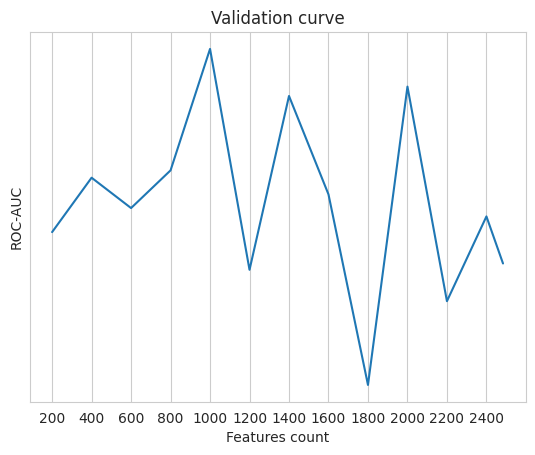

In [134]:
sns.set_style('whitegrid')
plt.xticks(np.arange(0, len(X_train_boost.columns) + 200, 200))
plt.yticks(np.linspace(0, 1, 11))
plt.title('Validation curve')
plt.xlabel('Features count')
plt.ylabel('ROC-AUC')

sns.lineplot(x=f_counts, y=roc_auc_scores)

In [55]:
drop_columns = list(feat_imp_dict.keys())[1000:]

In [56]:
X_train_boost = X_train_boost.drop(drop_columns, axis=1)

In [57]:
X_test_boost = X_test_boost.drop(drop_columns, axis=1)

In [58]:
new_cat_cols = [col for col in X_train_boost.columns if col in cat_cols]

Then create grid search for gradient boosting model and save the best.

In [139]:
parameters = {
    'learning_rate': np.logspace(-2, -1, 5),
    'max_depth': np.array([9, 10, 11]),
    'n_estimators': np.linspace(600, 900, 4).astype(int)
}

In [145]:
catboost_model = CatBoostClassifier(eval_metric='AUC', cat_features=new_cat_cols, verbose=200)

grid_search_result = catboost_model.grid_search(parameters, X=X_train_boost, y=y_train, 
                                       plot=True, cv=5, shuffle=True, train_size=.6)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8338779	best: 0.8338779 (0)	total: 119ms	remaining: 1m 23s
200:	test: 0.8571048	best: 0.8581493 (89)	total: 31s	remaining: 1m 16s
400:	test: 0.8534239	best: 0.8581493 (89)	total: 1m 2s	remaining: 46.4s
600:	test: 0.8504028	best: 0.8581493 (89)	total: 1m 33s	remaining: 15.3s
699:	test: 0.8489951	best: 0.8581493 (89)	total: 1m 48s	remaining: 0us

bestTest = 0.8581492869
bestIteration = 89

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8581493	best: 0.8581493 (0)	total: 1m 48s	remaining: 1h 47m 1s
0:	test: 0.8338024	best: 0.8338024 (0)	total: 108ms	remaining: 1m 15s
200:	test: 0.8531201	best: 0.8565609 (73)	total: 30.8s	remaining: 1m 16s
400:	test: 0.8491639	best: 0.8565609 (73)	total: 1m	remaining: 45.4s
600:	test: 0.8452643	best: 0.8565609 (73)	total: 1m 32s	remaining: 15.2s
699:	test: 0.8450604	best: 0.8565609 (73)	total: 1m 47s	remaining: 0us

bestTest = 0.8565608756
bestItera

KeyboardInterrupt: 

In [32]:
# best_roc_auc = 0
# best_params = []

# for params in product(parameters['n_estimators'], parameters['learning_rate'], parameters['max_depth'], repeat=1):
#     model = CatBoostClassifier(n_estimators=params[0], learning_rate=params[1], max_depth=params[2],
#                               silent=True, eval_metric='AUC', cat_features=cat_cols)
#     model.fit(X_train, y_train)
    
#     predictions = model.predict(X_holdout)
#     try:
#         cur_roc_auc = roc_auc_score(y_holdout, predictions)
#         if cur_roc_auc > best_roc_auc:
#             best_roc_auc = cur_roc_auc
#             best_params.clear()
#             best_params.append(params)
#         elif np.abs(cur_roc_auc - best_roc_auc) < 10**-5:
#             best_params.append(params)
#     except:
#         continue

Best roc_auc score on CatBoost

In [33]:
# best_roc_auc

Best params bor CatBoostClassifier params': {'depth': 9, 'iterations': 600, 'learning_rate': 0.01}

In [ ]:
# grid_search_result

In [59]:
cat_boost_model = CatBoostClassifier(n_estimators=600, learning_rate=0.01, max_depth=9,
                                    cat_features=new_cat_cols, eval_metric='AUC', verbose=100, random_seed=17)
cat_boost_model.fit(X_train_boost, y_train)
# predictions = cat_boost_model.predict_proba(X_test_boost)[:,1]
# submission_example['Churn'] = predictions
# submission_example.to_csv('/kaggle/working/predictions.csv', index=False)

0:	total: 314ms	remaining: 3m 8s
100:	total: 27.8s	remaining: 2m 17s
200:	total: 55.6s	remaining: 1m 50s
300:	total: 1m 23s	remaining: 1m 23s
400:	total: 1m 50s	remaining: 54.7s
500:	total: 2m 17s	remaining: 27.2s
[CV 2/5; 37/60] END C=1.9306977288832496, class_weight=None, penalty=l1;, score=nan total time=   0.4s
[CV 5/5; 37/60] START C=1.9306977288832496, class_weight=None, penalty=l1.......
[CV 5/5; 37/60] END C=1.9306977288832496, class_weight=None, penalty=l1;, score=nan total time=   0.1s
[CV 4/5; 38/60] START C=1.9306977288832496, class_weight=None, penalty=l2.......
[CV 4/5; 38/60] END C=1.9306977288832496, class_weight=None, penalty=l2;, score=0.849 total time=   3.3s
[CV 4/5; 39/60] START C=1.9306977288832496, class_weight=balanced, penalty=l1...
[CV 4/5; 39/60] END C=1.9306977288832496, class_weight=balanced, penalty=l1;, score=nan total time=   0.1s
[CV 3/5; 40/60] START C=1.9306977288832496, class_weight=balanced, penalty=l2...
[CV 3/5; 40/60] END C=1.9306977288832496, cl

# XGBoost

Try to use XGBClassifier for this task.

I'm going to use data for linear regression without normalization for numeric cols: it's not important for gradient boosting alghoritm.

In [31]:
X_train_xgb.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0.125000,19.50,1026.35,0.258380,0.231982,0.195188,0.153176,0.2636,0.246914,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.110906,0.158388,0.192630
1,0.017606,25.85,1872.20,0.258380,0.231982,0.195188,0.309576,0.2636,0.282222,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.025781,0.158388,0.144357
2,0.617068,75.90,75.90,0.258380,0.231982,0.325693,0.309576,0.2636,0.246914,0.410081,0.418836,0.396655,0.388433,0.148341,0.333492,0.338779,0.421575,0.332274,0.444569
3,0.266667,79.30,2570.00,0.265702,0.420428,0.195188,0.309576,0.2636,0.282222,0.410081,0.418836,0.396655,0.220395,0.412442,0.333492,0.338779,0.421575,0.158388,0.192630
4,0.075472,115.25,6758.45,0.265702,0.231982,0.195188,0.153176,0.2636,0.282222,0.410081,0.136037,0.208402,0.220395,0.148341,0.294809,0.289806,0.025781,0.158388,0.144357


In [61]:
model = XGBClassifier(eval_metric=roc_auc_score, cat_features=cat_cols)
model.fit(X_train_xgb, y_train)
feat_imp = model.feature_importances_

[18:35:59] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features" } are not used.



Next step is Feature Selection: check the feature importance and select top-k features (we'll find k by means of plot in this section)

In [62]:
feat_imp

array([9.6371936e-05, 2.4472687e-03, 2.1781721e-03, ..., 1.6609842e-03,
       0.0000000e+00, 9.3254755e-04], dtype=float32)

In [63]:
feat_imp_dict = {X_train_xgb.columns[i]: feat_imp[i] for i in range(len(feat_imp))}
feat_imp_dict = dict(sorted(feat_imp_dict.items(), key=lambda item: item[1], reverse=True))

In [64]:
drop_columns = list(dict(filter(lambda item: item[1] == 0, feat_imp_dict.items())).keys())
X_train_xgb = X_train_xgb.drop(drop_columns, axis=1)

In [65]:
X_test_xgb = X_test_xgb.drop(drop_columns, axis=1)

In [64]:
new_cat_cols_xgb = [col for col in X_train_xgb.columns if col in cat_cols]

parameters = {
    'n_estimators': np.linspace(200, 600, 5).astype(int),
    'max_depth': [7, 8, 9],
    'learning_rate': np.logspace(-2, -1 ,4),
    'lambda': [0, 0.5, 1],
    'alpha': [0, 0.5, 1]
}

In [65]:
X_train_XGB, X_holdout_XGB, y_train_XGB, y_holdout_XGB = train_test_split(X_train_xgb, y_train, test_size=.3,
                                                         random_state=17, shuffle=True)

In [66]:
feat_imp_dict = dict(filter(lambda item: item[1] > 0, feat_imp_dict.items()))

In [67]:
roc_auc_scores = []
f_counts = []

for i in range(0, len(feat_imp_dict), 50):
    if i + 50 > len(feat_imp_dict):
        cur_cols = list(feat_imp_dict.keys())
    else:
        cur_cols = list(feat_imp_dict.keys())[:i+50]
    cur_cat_cols = [col for col in cur_cols if col in cat_cols]
    model = XGBClassifier(cat_features=cur_cat_cols, verbose=200, eval_metric=roc_auc_score)
    model.fit(X_train_XGB[cur_cols], y_train_XGB)
    
    roc_auc_scores.append(roc_auc_score(y_holdout_XGB, model.predict(X_holdout_XGB[cur_cols])))
    f_counts.append(len(cur_cols))

[16:29:40] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features", "verbose" } are not used.

[16:29:41] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features", "verbose" } are not used.

[16:29:42] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features", "verbose" } are not used.

[16:29:44] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features", "verbose" } are not used.

[16:29:47] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features", "verbose" } are not used.

[16:29:51] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features", "verbose" } are not used.

[16:29:55] WARNING: ../src/learner.cc:767: 
Parameters: { "cat_features", "verbose" } are not used.




KeyboardInterrupt



<Axes: title={'center': 'Validation curve'}, xlabel='Features count', ylabel='ROC-AUC'>

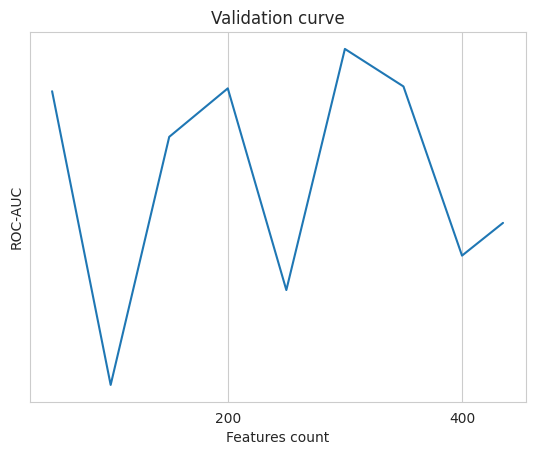

In [178]:
sns.set_style('whitegrid')
plt.xticks(np.arange(0, len(X_train_boost.columns) + 200, 200))
plt.yticks(np.linspace(0, 1, 11))
plt.title('Validation curve')
plt.xlabel('Features count')
plt.ylabel('ROC-AUC')

sns.lineplot(x=f_counts, y=roc_auc_scores)

In [67]:
drop_columns = list(feat_imp_dict.keys())[300:]
X_train_xgb = X_train_xgb.drop(drop_columns, axis=1)
X_test_xgb = X_test_xgb.drop(drop_columns, axis=1)

In [68]:
X_train_xgb

,MonthlySpending,TotalSpent,HasMultiplePhoneNumbers,ClientPeriod**ClientPeriod,"Manhattan distance between ClientPeriod, Sex",exp(ClientPeriod-Sex),ClientPeriod*IsSeniorCitizen,"Distance between ClientPeriod, IsSeniorCitizen","Manhattan distance between ClientPeriod, IsSeniorCitizen",1/(ClientPeriod**-1 + IsSeniorCitizen**-1,...,TotalSpent_dev_by_HasOnlineBackup,TotalSpent_mean_by_HasDeviceProtection,TotalSpent_mean_by_HasOnlineTV,TotalSpent_mean_by_HasContractPhone,TotalSpent_min_by_HasContractPhone,TotalSpent_max_by_HasContractPhone,TotalSpent_mean_by_IsBillingPaperless,TotalSpent_min_by_IsBillingPaperless,TotalSpent_mean_by_PaymentMethod,TotalSpent_max_by_PaymentMethod
0,19.50,1026.35,0.246914,0.771105,0.133380,0.875132,0.028998,0.263516,0.106982,0.086656,...,1.805444,1.275627,1.312612,-0.700747,-0.104034,-1.137062,1.213512,-0.384317,1.545558,1.718763
1,25.85,1872.20,0.282222,0.931351,0.240775,0.786019,0.004084,0.232649,0.214376,0.024779,...,1.805999,1.275921,1.312914,-1.403803,-1.390035,-1.095506,1.214569,-0.006784,-1.030469,-0.819131
2,75.90,75.90,0.246914,0.742371,0.358687,1.431449,0.143149,0.659233,0.385086,0.174603,...,-0.180743,0.392271,0.445177,0.873813,-0.626732,0.897424,-0.826471,-1.112230,0.256545,-0.033533
3,79.30,2570.00,0.282222,0.702951,0.000964,1.000965,0.112114,0.497866,0.153761,0.168415,...,-0.179106,-1.297418,0.446067,0.874867,0.480643,0.901015,1.215440,0.304669,1.546428,1.723877
4,115.25,6758.45,0.282222,0.822819,0.190231,0.826768,0.017508,0.243950,0.156510,0.063162,...,-0.905228,-1.295965,-1.190518,-1.401739,0.779450,-1.088469,1.220673,2.174126,-1.027715,-0.802944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,30.40,82.15,0.247601,0.700100,0.204583,1.227013,0.107399,0.517832,0.230981,0.160080,...,-0.180739,0.392273,0.445179,0.873816,-0.623957,0.897433,1.212333,-0.805748,0.256549,-0.033512
5278,44.45,2188.45,0.247601,0.738171,0.085303,0.918234,0.040151,0.289433,0.058905,0.104224,...,-0.179356,0.393004,-1.192150,-0.700256,0.411936,-1.135389,-0.823832,-0.169322,-0.974274,-0.928532
5279,55.05,55.05,0.246914,0.742371,0.358687,1.431449,0.143149,0.659233,0.385086,0.174603,...,-0.180757,-1.298291,0.445169,0.873804,-0.635990,0.897394,1.212299,-0.817844,1.545011,1.715545
5280,76.00,2215.25,0.282222,0.731765,0.080517,0.922639,0.042960,0.296832,0.046797,0.108039,...,-0.179339,0.393013,0.445941,0.874717,0.323135,0.900504,-0.823798,-0.157361,-1.030275,-0.817995


In [ ]:
# new_cat_cols_xgb = [col for col in X_train_xgb.columns if col in cat_cols]

# parameters = {
#     'n_estimators': np.linspace(600, 800, 3).astype(int),
#     'max_depth': [7, 8, 9],
#     'learning_rate': np.logspace(-2, -1 ,4)
# }

# xgb_model = XGBClassifier(eval_metric=roc_auc_score, cat_features=new_cat_cols_xgb,
#                          verbosity=0)

# cv_xgb_model = GridSearchCV(xgb_model, param_grid=parameters,
#                                n_jobs=-1, cv=5, verbose=200, scoring='roc_auc')
# cv_xgb_model.fit(X_train_xgb, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [70]:
new_cat_cols_xgb = [col for col in X_train_xgb.columns if col in cat_cols]

parameters = {
    'n_estimators': np.linspace(600, 800, 3).astype(int),
    'max_depth': [7, 8, 9],
    'learning_rate': np.logspace(-2, -1 ,4)
}

best_roc_auc = 0
best_params = []
counter = 0

for params in product(parameters['n_estimators'], parameters['learning_rate'],
                      parameters['max_depth'], repeat=1):
    model = XGBClassifier(n_estimators=params[0], learning_rate=params[1], max_depth=params[2],
                          eval_metric=roc_auc_score, cat_features=cat_cols, verbosity=0)
    model.fit(X_train_XGB, y_train_XGB)
    
    predictions = model.predict(X_holdout_XGB)
    counter += 1
    try:
        cur_roc_auc = roc_auc_score(y_holdout_XGB, predictions)
        if cur_roc_auc > best_roc_auc:
            best_roc_auc = cur_roc_auc
            best_params.clear()
            best_params.append(params)
        elif np.abs(cur_roc_auc - best_roc_auc) < 10**-5:
            best_params.append(params)
        if counter % 50 == 0:
            print(f'Count of fitted models: {counter}')
    except:
        continue

Parameters for best XGBClassifier

In [ ]:
# cv_xgb_model.best_params_

Best ROC-AUC for XGBClassifier

In [ ]:
# cv_xgb_model.best_score_

In [71]:
best_roc_auc

0.7061881198872202

In [72]:
best_params

[(600, 0.01, 8)]

In [69]:
xgb_model = XGBClassifier(n_estimators=600, learning_rate=0.01, max_depth=8,
                          reg_lambda=0, reg_alpha=1, eval_metric=roc_auc_score, cat_features=cat_cols,
                         verbosity=0)
xgb_model.fit(X_train_xgb, y_train)
# submission_example['Churn'] = xgb_model.predict_proba(X_test_xgb)[:, 1]
# submission_example.to_csv('/kaggle/working/predictions.csv', index=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              cat_features=['ClientPeriod', 'Sex', 'IsSeniorCitizen',
                            'HasPartner', 'HasChild', 'HasPhoneService',
                            'HasMultiplePhoneNumbers', 'HasInternetService',
                            'HasOnlineSecurityService', 'HasOnlineBackup',
                            'HasDeviceProtection', 'HasTechSupportAccess',
                            'HasOnlineTV', 'HasMovieSubscription',
                            'HasContractPhone', 'IsB...
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

# Blending CatBoost, XGBoost, LinearRegression

In [72]:
X_train_xgb_final

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0.125000,19.50,1026.35,0.258380,0.231982,0.195188,0.153176,0.263600,0.246914,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.110906,0.158388,0.192630
1,0.017606,25.85,1872.2,0.258380,0.231982,0.195188,0.309576,0.263600,0.282222,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.071867,0.025781,0.158388,0.144357
2,0.617068,75.90,75.9,0.258380,0.231982,0.325693,0.309576,0.263600,0.246914,0.410081,0.418836,0.396655,0.388433,0.148341,0.333492,0.338779,0.421575,0.332274,0.444569
3,0.266667,79.30,2570,0.265702,0.420428,0.195188,0.309576,0.263600,0.282222,0.410081,0.418836,0.396655,0.220395,0.412442,0.333492,0.338779,0.421575,0.158388,0.192630
4,0.075472,115.25,6758.45,0.265702,0.231982,0.195188,0.153176,0.263600,0.282222,0.410081,0.136037,0.208402,0.220395,0.148341,0.294809,0.289806,0.025781,0.158388,0.144357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.462963,30.40,82.15,0.258380,0.231982,0.325693,0.309576,0.247601,0.247601,0.190000,0.418836,0.396655,0.388433,0.148341,0.333492,0.338779,0.421575,0.158388,0.444569
5278,0.173077,44.45,2188.45,0.258380,0.231982,0.195188,0.309576,0.247601,0.247601,0.190000,0.136037,0.396655,0.388433,0.148341,0.294809,0.338779,0.110906,0.332274,0.168248
5279,0.617068,55.05,55.05,0.258380,0.231982,0.325693,0.309576,0.263600,0.246914,0.190000,0.418836,0.396655,0.220395,0.148341,0.333492,0.338779,0.421575,0.158388,0.192630
5280,0.185185,76.00,2215.25,0.265702,0.231982,0.325693,0.309576,0.263600,0.282222,0.410081,0.418836,0.396655,0.388433,0.412442,0.333492,0.338779,0.421575,0.332274,0.144357


In [75]:
new_cat_cols_xgb = [col for col in X_train_xgb.columns if col in cat_cols]
new_cat_cols = [col for col in X_train_boost.columns if col in cat_cols]

For mini-models the best params:
- LR: C = 0.1, penalty = 'l2', weighted = None
- catboost: n_estimators = 200, max_depth = 6, learning_rate = 0.068
- xgboost: n_estimators = 200, max_depth = 6, learning_rate = 0.049

In [86]:
for col in num_cols:
    X_train_boost_final[col] = X_train_boost[col]
    X_train_xgb_final[col] = X_train_boost[col]
    
    X_test_boost_final[col] = X_test_boost[col]
    X_test_xgb_final[col] = X_test_boost[col]

In [88]:
xgb_second_model = XGBClassifier(n_estimators=600, learning_rate=0.01, max_depth=8,
                          reg_lambda=0, reg_alpha=1, eval_metric=roc_auc_score, cat_features=new_cat_cols_xgb,
                         verbosity=0, random_state=99)

catboost_second_model = CatBoostClassifier(n_estimators=600, learning_rate=0.01, max_depth=9,
                                    cat_features=new_cat_cols, eval_metric='AUC', verbose=100, random_seed=93)

catboost_second_model.fit(X_train_boost, y_train)
xgb_second_model.fit(X_train_xgb, y_train)

sec_linear_model = LogisticRegression(C=0.1, class_weight=None, penalty='l2')
sec_linear_model.fit(X_train_linear_final, y_train)

catboost_third_model = CatBoostClassifier(n_estimators=200, learning_rate=0.068, max_depth=6,
                                    cat_features=cat_cols, eval_metric='AUC', verbose=100, random_seed=1)
catboost_third_model.fit(X_train_boost_final, y_train)

xgb_third_model = XGBClassifier(n_estimators=200, learning_rate=0.049, max_depth=6,
                          reg_lambda=0, reg_alpha=1, eval_metric=roc_auc_score, cat_features=cat_cols,
                         verbosity=0, random_state=1)
xgb_third_model.fit(X_train_xgb_final, y_train)

lin_pred, cb_pred1, cb_pred2, xgb_pred1, xgb_pred2 = linear_model.predict_proba(X_test_linear)[:, 1],\
cat_boost_model.predict_proba(X_test_boost)[:, 1], catboost_second_model.predict_proba(X_test_boost)[:, 1],\
xgb_model.predict_proba(X_test_xgb)[:, 1], xgb_second_model.predict_proba(X_test_xgb)[:, 1]
lin_sec_pred, cb_pred3, xgb_pred3 = sec_linear_model.predict_proba(X_test_linear_final), catboost_third_model.predict_proba(X_test_boost_final), \
xgb_third_model.predict_proba(X_test_xgb_final)

0:	total: 310ms	remaining: 3m 5s
100:	total: 28.4s	remaining: 2m 20s
200:	total: 57.2s	remaining: 1m 53s
300:	total: 1m 24s	remaining: 1m 24s
400:	total: 1m 52s	remaining: 56s
500:	total: 2m 19s	remaining: 27.6s
599:	total: 2m 47s	remaining: 0us
0:	total: 36.7ms	remaining: 7.3s
100:	total: 1.22s	remaining: 1.2s
199:	total: 2.5s	remaining: 0us


In [149]:
pred_results = pd.DataFrame({
    'LR': lin_pred, 
    'first_catboost':cb_pred1,
    'second_catboost':cb_pred2,
    'first_xgb':xgb_pred1,
    'second_xgb':xgb_pred2,
    'mini-LR': lin_sec_pred[:, 1],
    'mini-catboost': cb_pred3[:, 1],
    'mini-xgboost': xgb_pred3[:, 1]
})
pred_results

,LR,first_catboost,second_catboost,first_xgb,second_xgb,mini-LR,mini-catboost,mini-xgboost
0,0.698523,0.039380,0.057906,0.205731,0.205731,0.100204,0.027399,0.048932
1,0.641225,0.764657,0.752055,0.754206,0.754206,0.524058,0.700680,0.702538
2,0.718496,0.656586,0.674051,0.634688,0.634688,0.646729,0.634493,0.582174
3,0.218037,0.011915,0.015918,0.113095,0.113095,0.039497,0.013557,0.032804
4,0.001572,0.002954,0.003240,0.005472,0.005472,0.018065,0.007898,0.003658
...,...,...,...,...,...,...,...,...
1756,0.094868,0.143050,0.135910,0.170668,0.170668,0.092207,0.130531,0.257345
1757,0.010827,0.013270,0.012596,0.020440,0.020440,0.044809,0.011944,0.010445
1758,0.844639,0.879646,0.855200,0.954251,0.954251,0.760628,0.843571,0.918954
1759,0.540110,0.466634,0.486778,0.754049,0.754049,0.543154,0.602776,0.501374


In [154]:
total_pred = generate_predictions(pred_results)

11.579026274530683


In [156]:
# submission_example['Churn'] = total_pred / 11.58
# submission_example.to_csv('/kaggle/working/predictions.csv', index=False)

Low quality!( (0.8475 on the leaderboard)

Go back to the basics and try default algorithms (in the stacking form)

In [46]:
linear_model = LogisticRegression(C=0.1, class_weight=None, penalty='l2')

cat_boost_model = CatBoostClassifier(learning_rate=0.068, cat_features=cat_cols,
                                     eval_metric='AUC', verbose=100, random_seed=1)

xgb_model = XGBClassifier(learning_rate=0.049, reg_lambda=0,
                          reg_alpha=1, eval_metric=roc_auc_score,
                          cat_features=cat_cols, verbosity=0, random_state=1)

fit_results = pd.DataFrame()
pred_results = pd.DataFrame()
for model, name, train_data, test_data in zip([linear_model, cat_boost_model, xgb_model], ['LR', 'CB', 'XGB'],
                            [X_train_linear, X_train_boost, X_train_xgb], [X_test_linear, X_test_boost, X_test_xgb]):
    model.fit(train_data, y_train)
    fit_results[name] = model.predict_proba(train_data)[:, 1]
    
    pred_results[name] = model.predict_proba(test_data)[:, 1]
    
stack_model = CatBoostClassifier(eval_metric='AUC', random_seed=12, verbose=200, cat_features=cat_cols)
stack_model.fit(pd.concat([fit_results, X_train_boost], axis=1), y_train)
predictions = stack_model.predict_proba(pd.concat([pred_results, X_test_boost], axis=1))[:, 1]

0:	total: 33.2ms	remaining: 33.2s
100:	total: 1.28s	remaining: 11.4s
200:	total: 2.65s	remaining: 10.5s
300:	total: 4.05s	remaining: 9.4s
400:	total: 5.48s	remaining: 8.18s
500:	total: 6.92s	remaining: 6.89s
600:	total: 8.46s	remaining: 5.61s
700:	total: 10s	remaining: 4.28s
800:	total: 11.4s	remaining: 2.84s
900:	total: 12.9s	remaining: 1.42s
999:	total: 14.4s	remaining: 0us
Learning rate set to 0.020969
0:	total: 12.2ms	remaining: 12.1s
200:	total: 2.62s	remaining: 10.4s
400:	total: 5.41s	remaining: 8.08s
600:	total: 8.4s	remaining: 5.58s
800:	total: 11.3s	remaining: 2.82s
999:	total: 14.4s	remaining: 0us


In [47]:
roc_auc_score(y_train, stack_model.predict(pd.concat([fit_results, X_train_boost], axis=1)))

0.8924442874217399

In [48]:
submission_example['Churn'] = predictions
submission_example.to_csv('/kaggle/working/predictions.csv', index=False)

Low quality on stacking model (0.817) :(

Try weighted blending without feature engineering with default models (Logistic Regression, two catboosts and two xgboosts) and feature selection

In [105]:
drop_cols_linear = [X_train_linear.columns[i] for i in range(len(X_train_linear.columns))
                   if abs(linear_model.coef_[0][i]) <= 0.1]
drop_cols_CBfirst = [X_train_boost.columns[i] for i in range(len(X_train_boost.columns))
                   if catboost_model.feature_importances_[i] <= 1]
drop_cols_CBsec = [X_train_boost.columns[i] for i in range(len(X_train_boost.columns))
                   if catboost_sec_model.feature_importances_[i] <= 1]
drop_cols_XGBfirst = [X_train_xgb.columns[i] for i in range(len(X_train_xgb.columns))
                   if xgb_model.feature_importances_[i] * 100 <= 1]
drop_cols_XGBsecond = [X_train_xgb.columns[i] for i in range(len(X_train_xgb.columns))
                   if xgb_sec_model.feature_importances_[i] * 100 <= 1]

In [107]:
cat_cols_fcb = [col for col in cat_cols if col not in drop_cols_CBfirst]
cat_cols_scb = [col for col in cat_cols if col not in drop_cols_CBsec]
cat_cols_fxgb = [col for col in cat_cols if col not in drop_cols_XGBfirst]
cat_cols_sxgb = [col for col in cat_cols if col not in drop_cols_XGBsecond]

In [108]:
linear_model = LogisticRegression(C=0.1, class_weight=None, penalty='l2')
linear_model.fit(X_train_linear.drop(drop_cols_linear, axis=1), y_train)

catboost_model = CatBoostClassifier(learning_rate=0.068, cat_features=cat_cols_fcb,
                                    eval_metric='AUC', verbose=100, random_seed=1)
catboost_model.fit(X_train_boost.drop(drop_cols_CBfirst, axis=1), y_train)
catboost_sec_model = CatBoostClassifier(learning_rate=0.068, cat_features=cat_cols_scb,
                                        eval_metric='AUC', verbose=100, random_seed=99)
catboost_sec_model.fit(X_train_boost.drop(drop_cols_CBsec, axis=1), y_train)

xgb_model = XGBClassifier(learning_rate=0.01, eval_metric=roc_auc_score, cat_features=cat_cols_fxgb,
                         verbosity=0, random_state=1)
xgb_model.fit(X_train_xgb.drop(drop_cols_XGBfirst, axis=1), y_train)
xgb_sec_model = XGBClassifier(learning_rate=0.049, eval_metric=roc_auc_score,
                              cat_features=cat_cols_sxgb, verbosity=0, random_state=99)
xgb_sec_model.fit(X_train_xgb.drop(drop_cols_XGBsecond, axis=1), y_train)

lin_pred, cb_pred1, cb_pred2, xgb_pred1, xgb_pred2 = linear_model.predict_proba(X_test_linear.drop(drop_cols_linear, axis=1))[:, 1],\
catboost_model.predict_proba(X_test_boost.drop(drop_cols_CBfirst, axis=1))[:, 1], catboost_sec_model.predict_proba(X_test_boost.drop(drop_cols_CBsec, axis=1))[:, 1],\
xgb_model.predict_proba(X_test_xgb.drop(drop_cols_XGBfirst, axis=1))[:, 1], xgb_sec_model.predict_proba(X_test_xgb.drop(drop_cols_XGBsecond, axis=1))[:, 1]

0:	total: 45.2ms	remaining: 45.1s
100:	total: 1.42s	remaining: 12.7s
200:	total: 2.83s	remaining: 11.3s
300:	total: 4.16s	remaining: 9.66s
400:	total: 5.51s	remaining: 8.23s
500:	total: 6.87s	remaining: 6.84s
600:	total: 8.24s	remaining: 5.47s
700:	total: 9.62s	remaining: 4.1s
800:	total: 11s	remaining: 2.74s
900:	total: 12.4s	remaining: 1.36s
999:	total: 13.8s	remaining: 0us
0:	total: 13.8ms	remaining: 13.8s
100:	total: 1.25s	remaining: 11.1s
200:	total: 2.57s	remaining: 10.2s
300:	total: 3.93s	remaining: 9.13s
400:	total: 5.29s	remaining: 7.91s
500:	total: 6.7s	remaining: 6.67s
600:	total: 8.07s	remaining: 5.36s
700:	total: 9.45s	remaining: 4.03s
800:	total: 10.8s	remaining: 2.69s
900:	total: 12.2s	remaining: 1.34s
999:	total: 13.6s	remaining: 0us


In [109]:
pred_results = pd.DataFrame({
    'LR': lin_pred, 
    'first_catboost':cb_pred1,
    'second_catboost':cb_pred2,
    'first_xgb':xgb_pred1,
    'second_xgb':xgb_pred2
})
pred_results

,LR,first_catboost,second_catboost,first_xgb,second_xgb
0,0.100827,0.015251,0.030344,0.223054,0.060012
1,0.525745,0.824286,0.751208,0.500734,0.637465
2,0.645963,0.587617,0.776379,0.628991,0.691696
3,0.039615,0.010426,0.049525,0.192084,0.046936
4,0.018164,0.001151,0.000898,0.192084,0.008742
...,...,...,...,...,...
1756,0.092401,0.180324,0.098562,0.271081,0.348034
1757,0.045117,0.005645,0.007560,0.192084,0.012861
1758,0.762432,0.839317,0.916560,0.686287,0.882987
1759,0.545214,0.492070,0.568874,0.538856,0.528592


In [110]:
def generate_predictions(results):
    for_mult_less = {
        'LR': 0.667, 
        'first_catboost':1,
        'second_catboost':0.889,
        'first_xgb':0.444,
        'second_xgb':0.667
    }
    for_mult_great = {
        'LR': 1.5, 
        'first_catboost': 2.25,
        'second_catboost': 2,
        'first_xgb':1,
        'second_xgb':1.5
    }
    result = []
    for ind in range(len(results)):
        if np.mean(results.iloc[ind, :]) < 0.5:
            result.append(np.sum([results.iloc[ind, :][col] * for_mult_less[col] for col in results.columns]))
        else:
            result.append(np.sum([results.iloc[ind, :][col] * for_mult_great[col] for col in results.columns]))
    
    return np.array(result)

In [111]:
predictions = generate_predictions(pred_results)

In [114]:
fit_predictions = pd.DataFrame()
for model, data, name in zip([linear_model, catboost_model, catboost_sec_model, xgb_model, xgb_sec_model],
                             [X_train_linear.drop(drop_cols_linear, axis=1), X_train_boost.drop(drop_cols_CBfirst, axis=1), X_train_boost.drop(drop_cols_CBsec, axis=1), X_train_xgb.drop(drop_cols_XGBfirst, axis=1), X_train_xgb.drop(drop_cols_XGBsecond, axis=1)],
                             ['LR', 'first_catboost', 'second_catboost', 'first_xgb', 'second_xgb']):
    fit_predictions[name] = model.predict_proba(data)[:, 1]
    
fit_pred = generate_predictions(fit_predictions)
roc_aucs = {}
for border in np.linspace(7.56, 10, 30):
    roc_aucs[border] = roc_auc_score(y_train, ((fit_pred / border) > 0.5).astype(int))

In [115]:
max(roc_aucs.items(), key=lambda item: item[1])

(7.56, 0.7567742609964501)

In [117]:
submission_example['Churn'] = predictions / 7.58
submission_example.to_csv('/kaggle/working/predictions.csv', index=False)

Last Solution is the best: Blending with Logistic Regression, two Catboosts and two XGBoosts with different weights (choosed empirically)
Best score: 0.8516